# Assignment 6: Evaluation of Models
###  Daisy Pinaroc

## Step 2) Compute classification metrics with the default threshold 

In [146]:
import pandas as pd
from googleapiclient import discovery
import json
import numpy as np
import time

import warnings
warnings.filterwarnings("ignore")

In [147]:
# Load the sample data CSV files into a dataframe
df = pd.read_csv('toxicity_labeled_test_data_sub_sampled.csv')
df = df.drop_duplicates()
df = df.dropna()
#df['toxicity_scores'] = ''
df.head()

,comment_text,toxic
0,Thank you,no
1,dbadvert tag on KPDFCA Wow Doesnt seem to...,no
2,Good Bye Intoronto1125 RIP Hope to see you in...,yes
3,You were trying to ban me Perhaps in future yo...,yes
4,retarded cousin of the spork,yes


In [10]:
# Create a function that can take any comment (string) as input and return perpective's toxicity score as output
def toxicity_score(comment):
    # second API key created
    API_KEY = 'XXXXXX'
    
    client = discovery.build("commentanalyzer","v1alpha1", developerKey=API_KEY, discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1", static_discovery=False,)

    analyze_request = {'comment': { 'text': comment},'requestedAttributes': {'TOXICITY': {}},'languages': ['en']}
    
    response = client.comments().analyze(body=analyze_request).execute()
    toxic_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
    return toxic_score
    # print(json.dumps(response, indent=2))

In [148]:
toxic_df = pd.DataFrame()
# toxic_df['toxicity_scores'] = ''
toxic_score_list = []
#comments = []
    
# Use the function to get toxicity scores for each comment in the sample data
count = 0
for index, comment in df.iterrows():
    comment = comment['comment_text']
    #comments.append(comment)
    try:
        score = toxicity_score(comment) 
        toxic_score_list.append(score)
    except Exception as e:
        print(comment)
        print(e)
        break
#     print(comment)
    
    #toxic_df = toxic_df.append({'toxicity_scores': score}, ignore_index=True)
    time.sleep(2)
    
#     count += 1
    
#     if count > 6:
#         break

print(toxic_score_list)
#print(comments)

[0.011309455, 0.15048122, 0.7308154, 0.50789946, 0.63782936, 0.46186632, 0.8696708, 0.6426206, 0.31132057, 0.78711975, 0.09481675, 0.3666224, 0.6989911, 0.42568782, 0.037577134, 0.13214645, 0.8778702, 0.74954444, 0.03592727, 0.04067813, 0.015330595, 0.687436, 0.012943043, 0.1269396, 0.32764325, 0.054779384, 0.5779532, 0.013257195, 0.085582085, 0.01822079, 0.3561489, 0.11119666, 0.24763705, 0.11305673, 0.6308517, 0.054037213, 0.056263726, 0.44039994, 0.10089093, 0.36095104, 0.03592727, 0.17111848, 0.7510937, 0.059974585, 0.07291982, 0.6588125, 0.01834645, 0.041172907, 0.015330595, 0.9288007, 0.017969469, 0.07054565, 0.32764325, 0.3057765, 0.016964182, 0.6426206, 0.07845957, 0.7856813, 0.60311776, 0.51980776, 0.72028047, 0.73663366, 0.024378212, 0.9563754, 0.46982017, 0.17718399, 0.07845957, 0.12520397, 0.61223894, 0.115658075, 0.09438288, 0.059479803, 0.24282593, 0.026617315, 0.9817629, 0.8252207, 0.2855005, 0.3389984, 0.07450261, 0.54823303, 0.82048255, 0.017089844, 0.1460314, 0.033098

In [149]:
# Form a separate column containing toxicity scores. Name it as "toxicity_scores".
df['toxicity_scores'] = toxic_score_list
df.head()

,comment_text,toxic,toxicity_scores
0,Thank you,no,0.011309
1,dbadvert tag on KPDFCA Wow Doesnt seem to...,no,0.150481
2,Good Bye Intoronto1125 RIP Hope to see you in...,yes,0.730815
3,You were trying to ban me Perhaps in future yo...,yes,0.507899
4,retarded cousin of the spork,yes,0.637829


In [150]:
# Apply a thresholding mechanism to transform the scores into 0/1 classes
# Set the threshold to 0.5
transformed_toxicity_scores = []
for score in toxic_score_list:
    if score > 0.5:
        toxic_label = 1
    else:
        toxic_label = 0
    transformed_toxicity_scores.append(toxic_label)
    
print('Transformed Scores','---------------------', transformed_toxicity_scores,sep='\n')

Transformed Scores
---------------------
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0

In [151]:
# Form another column named "toxic_predicted"
df['toxic_predicted'] = transformed_toxicity_scores
df.head()

,comment_text,toxic,toxicity_scores,toxic_predicted
0,Thank you,no,0.011309,0
1,dbadvert tag on KPDFCA Wow Doesnt seem to...,no,0.150481,0
2,Good Bye Intoronto1125 RIP Hope to see you in...,yes,0.730815,1
3,You were trying to ban me Perhaps in future yo...,yes,0.507899,1
4,retarded cousin of the spork,yes,0.637829,1


In [152]:
# Transforming toxic to binary values
transformed_toxics = []
for index, toxic in df.iterrows():
    toxic = toxic['toxic']
    value = 0
    if toxic == 'no':
        value = 0
    elif (toxic == 'yes'):
        value = 1
    transformed_toxics.append(value)

print(transformed_toxics)

[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [153]:
df.head()

,comment_text,toxic,toxicity_scores,toxic_predicted
0,Thank you,no,0.011309,0
1,dbadvert tag on KPDFCA Wow Doesnt seem to...,no,0.150481,0
2,Good Bye Intoronto1125 RIP Hope to see you in...,yes,0.730815,1
3,You were trying to ban me Perhaps in future yo...,yes,0.507899,1
4,retarded cousin of the spork,yes,0.637829,1


In [154]:
df = df.drop(['toxic'], axis=1)
df.head()

,comment_text,toxicity_scores,toxic_predicted
0,Thank you,0.011309,0
1,dbadvert tag on KPDFCA Wow Doesnt seem to...,0.150481,0
2,Good Bye Intoronto1125 RIP Hope to see you in...,0.730815,1
3,You were trying to ban me Perhaps in future yo...,0.507899,1
4,retarded cousin of the spork,0.637829,1


In [155]:
df['toxic'] = transformed_toxics
df.head()

,comment_text,toxicity_scores,toxic_predicted,toxic
0,Thank you,0.011309,0,0
1,dbadvert tag on KPDFCA Wow Doesnt seem to...,0.150481,0,0
2,Good Bye Intoronto1125 RIP Hope to see you in...,0.730815,1,1
3,You were trying to ban me Perhaps in future yo...,0.507899,1,1
4,retarded cousin of the spork,0.637829,1,1


In [156]:
# Generate a classification report using sklearn.metrics.classification_report. Consider toxic and toxic_predicted columns
from sklearn.metrics import classification_report

num = 0
set_value = 50
y_true = [] # toxic
y_pred =[] # toxic_predicted

# taking first few rows
while num < set_value:
    for index, toxic in df.iterrows():
        toxic = toxic['toxic']
        y_true.append(toxic)
        num += 1 

# print('y_true:',y_true)

num = 0 

while num < set_value:
    for index, toxic_predicted in df.iterrows():
        toxic_predicted = toxic_predicted['toxic_predicted']
        y_pred.append(toxic_predicted)
        num += 1 

# print('y_pred:',y_pred)

target_names = ['class 0','class 1']
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.92      0.94       357
     class 1       0.82      0.92      0.87       143

    accuracy                           0.92       500
   macro avg       0.89      0.92      0.91       500
weighted avg       0.92      0.92      0.92       500



#### Insights on Results

I see that 0.5 is a good threshold as it produces an accuracy of 0.92, and we know that an accuracy closest to 1.00 is most desirable. If someone wanted to predict whether a comment was toxic or not, then a threshold of 0.5 would be a good value to compare its toxicity score to. 

## Step 3) Get the best threshold by computing the RoC curve

Threshold = 2.0000, TPR = 0.0000, FPR = 0.0000
Threshold = 1.0000, TPR = 0.9161, FPR = 0.0784
Threshold = 0.0000, TPR = 1.0000, FPR = 1.0000


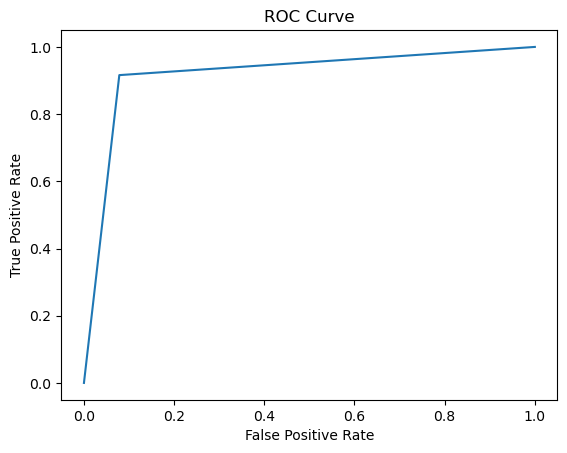

Optimal threshold value is: 1


In [157]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
i = 0
# for f in fpr:
#     print (f"Threshold = {thresholds[i]}, TPR = {tpr[i]} FPR = {f}")
#     i+=1
    

# Plot ROC curve
plt.plot(fpr, tpr)

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Print threshold, TPR, and FPR for each point on the curve
for i in range(len(thresholds)):
    print(f"Threshold = {thresholds[i]:.4f}, TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}")

# Show the plot
plt.show()

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold value is:", optimal_threshold)

### Insights
Based on the RoC curve which threshold value is best? Write your threshold value and insights in a markdown block. Was 0.5 a good or bad threshold, based on the RoC analysis? 
* **Best threshold value based on RoC curve: 1**, or values more closer to 1 like 0.75.
* In seeing the provided threshold value by the RoC curve, I was shocked to see how values closer to 1 were better thresholds. In the step before, 0.5 yielded a higher accuracy, so I thought the RoC analysis was going to support this. According to the RoC analysis, a threshold of 0.5 is not really considered "good". 

## Step 4) Generate classification report with the updated threshold

In [158]:
# Set the threshold to <updated threshold>
# compute the labels for all entries in "toxicity_scores" column
transformed_toxicity_scores_v2 = []
for score in toxic_score_list:
    if score > 1:
        toxic_label = 1
    else:
        toxic_label = 0
    transformed_toxicity_scores_v2.append(toxic_label)
    
print('Transformed Scores Again','---------------------', transformed_toxicity_scores_v2,sep='\n')

Transformed Scores Again
---------------------
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [159]:
# Form another column named "toxic_predicted_new"
df['toxic_predicted_new'] = transformed_toxicity_scores_v2
df.head()

,comment_text,toxicity_scores,toxic_predicted,toxic,toxic_predicted_new
0,Thank you,0.011309,0,0,0
1,dbadvert tag on KPDFCA Wow Doesnt seem to...,0.150481,0,0,0
2,Good Bye Intoronto1125 RIP Hope to see you in...,0.730815,1,1,0
3,You were trying to ban me Perhaps in future yo...,0.507899,1,1,0
4,retarded cousin of the spork,0.637829,1,1,0


In [160]:
# Generate a classification report using sklearn.metrics.classification_report. Consider toxic and toxic_predicted_new columns.
from sklearn.metrics import classification_report

num = 0
set_value = 50
y_true = [] # toxic
y_pred =[] # toxic_predicted_new

# taking first few rows
while num < set_value:
    for index, toxic in df.iterrows():
        toxic = toxic['toxic']
        y_true.append(toxic)
        num += 1 

# print('y_true:',y_true)

num = 0 

while num < set_value:
    for index, toxic_predicted in df.iterrows():
        toxic_predicted = toxic_predicted['toxic_predicted_new']
        y_pred.append(toxic_predicted)
        num += 1 

# print('y_pred:',y_pred)

target_names = ['class 0','class 1']
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      1.00      0.83       357
     class 1       0.00      0.00      0.00       143

    accuracy                           0.71       500
   macro avg       0.36      0.50      0.42       500
weighted avg       0.51      0.71      0.59       500



### Insights
What do you make out of the results? Write your insights in a markdown block.

* After doing a classification report with a threshold of 1, I see that accuracy actually went down by at least 0.20. This tells me that very high thresholds are not good as they produce a lower accuracy. Perhaps there was an error in determining the best threshold using the RoC analysis. 
* Threshold values closer to 0.5 rather than 1 actually produce higher accuracy, contrary to the RoC analysis results. 

### Testing a threshold of 0.55 (for extra measures)

In [161]:
# Set the threshold to <updated threshold>
# compute the labels for all entries in "toxicity_scores" column
transformed_toxicity_scores_v2 = []
for score in toxic_score_list:
    if score > 0.55:
        toxic_label = 1
    else:
        toxic_label = 0
    transformed_toxicity_scores_v2.append(toxic_label)
    
# print('Transformed Scores Again','---------------------', transformed_toxicity_scores_v2,sep='\n')

In [162]:
# Form another column named "toxic_predicted_new"
df['toxic_predicted_new'] = transformed_toxicity_scores_v2

In [163]:
# Form another column named "toxic_predicted_new"
df['toxic_predicted_new'] = transformed_toxicity_scores_v2
df.head()

,comment_text,toxicity_scores,toxic_predicted,toxic,toxic_predicted_new
0,Thank you,0.011309,0,0,0
1,dbadvert tag on KPDFCA Wow Doesnt seem to...,0.150481,0,0,0
2,Good Bye Intoronto1125 RIP Hope to see you in...,0.730815,1,1,1
3,You were trying to ban me Perhaps in future yo...,0.507899,1,1,0
4,retarded cousin of the spork,0.637829,1,1,1


In [164]:
# Generate a classification report using sklearn.metrics.classification_report. Consider toxic and toxic_predicted_new columns.
from sklearn.metrics import classification_report

num = 0
set_value = 50
y_true = [] # toxic
y_pred =[] # toxic_predicted_new

# taking first few rows
while num < set_value:
    for index, toxic in df.iterrows():
        toxic = toxic['toxic']
        y_true.append(toxic)
        num += 1 

# print('y_true:',y_true)

num = 0 

while num < set_value:
    for index, toxic_predicted in df.iterrows():
        toxic_predicted = toxic_predicted['toxic_predicted_new']
        y_pred.append(toxic_predicted)
        num += 1 

# print('y_pred:',y_pred)

target_names = ['class 0','class 1']
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.95      0.94       357
     class 1       0.87      0.82      0.84       143

    accuracy                           0.91       500
   macro avg       0.90      0.88      0.89       500
weighted avg       0.91      0.91      0.91       500



### More Thresholds Tested for Experimentation Purposes

* threshold: 0.2 - accuracy: 0.8
* threshold: 0.55 - accuracy: 0.91
* threshold: 0.8 - accuracy: 0.8
* threshold: 0.9 - accuracy: 0.74

Thresholds closer to 0 and 1 produce lower accuracies.